<a href="https://colab.research.google.com/github/olaidekashimawo/Data-Manipulation/blob/main/lego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTSC 580: Data Manipulation
## Assignment: LEGO Project
### Name:

# ![LegoSchema](Lego_Schema.PNG)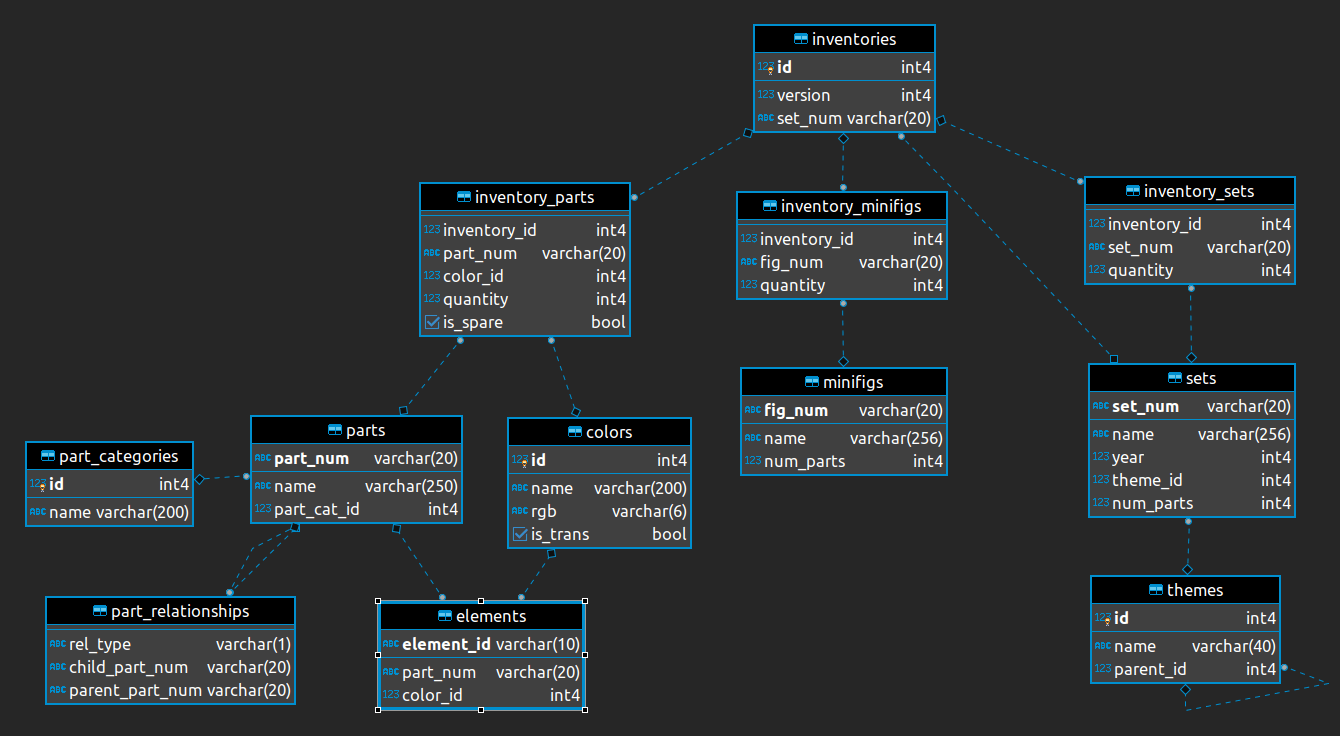

## Overview

In this assignment, you will load the various tables from the [Rebrickable](https://rebrickable.com/) website and perform analysis on the data.  Rebrickable is a fantastic website that is used to show you which LEGO sets you can build from the sets and parts you already own.  They will even show you which parts you are missing to complete the new set and suggest sets that you could purchase to get those parts.  

## Data

The data has been downloaded directly from their website and includes files for the tables shown in the schema above.  Your first task will be to go through the data and review the schema to understand how the tables all fit together.  There is no data dictionary that I am aware of, but you should be able to understand this data by reviewing the files and schema and visiting their [Download](https://rebrickable.com/downloads/) page and [API](https://rebrickable.com/api/) documentation.  **Note that you must use the files downloaded from Brightspace for this assignment and not download new files from the Rebrickable website.**

## Assignment

In this assignment, you will create a number of functions to complete certain tasks.  This is not needed if you were working on this project on your own, but since we want to see if you can select the data via Pandas/Numpy, we will use those functions in the automatic grading in CodeGrade.  Without this, students could try to look up the answers in the `csv` files instead of wrangling the data with Python/Pandas, which would defeat the purpose of this class.

In addition, we would strongly suggest that you merge data sets as appropriate for the given task.  For example, you might merge the `sets` and `themes` DataFrames to answer one question, and then merge `sets`, `inventories`, `inventory_minifigs`, and `minifigs` to answer another.  This will make your code much easier to write and will be key in working with data across multiple tables.  In fact, I was able to create each function with only one line of code because of the merging of certain data sets.  Also note that you may not use all the tables in this assignment.  This is also an important skill for a Data Scientist to know when to use data and what data is unnecessary.

When complete, save your notebook as `lego.ipynb` and submit to CodeGrade for automatic grading.

## Note

<u>Show Work</u>

Remember that you must show your work.  Students submissions are spot checked manually throughout the term to verify that they are not hard coding the answer from looking only in the file or in CodeGrade's expected output.  If this is seen, the student's answer will be manually marked wrong and their grade will be changed to reflect this.

For example, if the answer to Q1, the mean of a specific column, is 22:
```
# correct way
Q1 = df['column_name'].mean()

# incorrect way
Q1 = 22
```

Let's start out by importing some standard imports.

In [1]:
# common imports
import pandas as pd
import numpy as np

# Do not change this option; This allows the CodeGrade auto grading to function correctly
pd.set_option('display.max_columns', None)

## Import Data

Load the various Lego datasets below calling them the same as the name of the table as seen in the schema.  Note that you may or may not have to use all the data sets.  One of the things that all Data Scientists and Analysts have to decide when working on a project is what data is useful for a task and what data is not.  Remember to look at the schema above to see how all the data sets are connected.

The autograder in CodeGrade will have the `csv` files in the same location where the notebook is run.  Because of this, please make sure your local files are in the same location as your notebook.

In [2]:
# import Lego data sets here
# make sure that files are in the same folder as your notebook
inventories = pd.read_csv('inventories.csv')
inventory_sets = pd.read_csv('inventory_sets.csv')
sets = pd.read_csv('sets.csv')
themes = pd.read_csv('themes.csv')
inventory_minifigs = pd.read_csv('inventory_minifigs.csv')
minifigs = pd.read_csv('minifigs.csv')
inventory_parts = pd.read_csv('inventory_parts.csv')
part_categories = pd.read_csv('part_categories.csv')
parts = pd.read_csv('parts.csv')
colors = pd.read_csv('colors.csv')
part_relationships = pd.read_csv('part_relationships.csv')
elements = pd.read_csv('elements.csv')

## Exploration

Take time to look at all of the data sets using `.head()`, `.info()`, `.describe()`, etc to familiarize yourself with the data sets.  As you look at them, notice how the various tables connect together.

In [3]:
#invertories dataset
print(inventories.head())
print(inventories.info())
print(inventories.describe())

   id  version set_num
0   1        1  7922-1
1   3        1  3931-1
2   4        1  6942-1
3  15        1  5158-1
4  16        1   903-1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31587 entries, 0 to 31586
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       31587 non-null  int64 
 1   version  31587 non-null  int64 
 2   set_num  31587 non-null  object
dtypes: int64(2), object(1)
memory usage: 740.4+ KB
None
                  id       version
count   31587.000000  31587.000000
mean    43538.531389      1.077405
std     32458.542329      0.515993
min         1.000000      1.000000
25%     12193.500000      1.000000
50%     51076.000000      1.000000
75%     62254.500000      1.000000
max    122472.000000     11.000000


In [4]:
#invertory_sets dataset
### ENTER CODE HERE ###
print(inventory_sets.head())
print(inventory_sets.info())
print(inventory_sets.describe())

   inventory_id  set_num  quantity
0            35  75911-1         1
1            35  75912-1         1
2            39  75048-1         1
3            39  75053-1         1
4            50   4515-1         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  3413 non-null   int64 
 1   set_num       3413 non-null   object
 2   quantity      3413 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 80.1+ KB
None
        inventory_id     quantity
count    3413.000000  3413.000000
mean    25839.150601     1.857017
std     31384.971888     6.123060
min        35.000000     1.000000
25%      6117.000000     1.000000
50%     12465.000000     1.000000
75%     27003.000000     1.000000
max    122081.000000    60.000000


In [5]:
#sets dataset
print(sets.head())
print(sets.info())
print(sets.describe())

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1979        67         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18576 entries, 0 to 18575
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    18576 non-null  object
 1   name       18576 non-null  object
 2   year       18576 non-null  int64 
 3   theme_id   18576 non-null  int64 
 4   num_parts  18576 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 725.8+ KB
None
               year      theme_id     num_parts
count  18576.000000  18576.000000  18576.000000
mean    2006.200581    405.924365    160.666344
std       13.749798    197.8

In [6]:
#themes dataset
print(themes.head())
print(themes.info())
print(themes.describe())

   id            name  parent_id
0   1         Technic        NaN
1   3     Competition        1.0
2   4  Expert Builder        1.0
3  16      RoboRiders        1.0
4  17  Speed Slammers        1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         444 non-null    int64  
 1   name       444 non-null    object 
 2   parent_id  306 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.5+ KB
None
               id   parent_id
count  444.000000  306.000000
mean   410.659910  346.516340
std    208.165803  198.728717
min      1.000000    1.000000
25%    229.750000  186.000000
50%    438.500000  409.500000
75%    597.250000  507.000000
max    719.000000  697.000000


In [7]:
#inventory_minifigs dataset
print(inventory_minifigs.head())
print(inventory_minifigs.info())
print(inventory_minifigs.describe())

   inventory_id     fig_num  quantity
0             3  fig-001549         1
1             4  fig-000764         1
2            19  fig-000555         1
3            25  fig-000574         1
4            26  fig-000842         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18144 entries, 0 to 18143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  18144 non-null  int64 
 1   fig_num       18144 non-null  object
 2   quantity      18144 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 425.4+ KB
None
        inventory_id      quantity
count   18144.000000  18144.000000
mean    26470.198302      1.066138
std     30578.235290      0.831258
min         3.000000      1.000000
25%      6901.000000      1.000000
50%     13832.000000      1.000000
75%     32633.000000      1.000000
max    122344.000000    100.000000


In [8]:
#minifigs dataset
print(minifigs.head())
print(minifigs.info())
print(minifigs.describe())

      fig_num                             name  num_parts
0  fig-000001               Toy Store Employee          4
1  fig-000002                     Customer Kid          4
2  fig-000003            Assassin Droid, White          8
3  fig-000004                     Basic Figure          4
4  fig-000005  Captain America with Short Legs          3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11827 entries, 0 to 11826
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fig_num    11827 non-null  object
 1   name       11827 non-null  object
 2   num_parts  11827 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.3+ KB
None
          num_parts
count  11827.000000
mean       4.847637
std        3.562961
min        0.000000
25%        4.000000
50%        4.000000
75%        5.000000
max      148.000000


In [9]:
#inventory_parts dataset
print(inventory_parts.head())
print(inventory_parts.info())
print(inventory_parts.describe())

   inventory_id        part_num  color_id  quantity is_spare
0             1        48379c01        72         1        f
1             1           48395         7         1        f
2             1  stickerupn0077      9999         1        f
3             1         upn0342         0         1        f
4             1         upn0350        25         1        f
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989529 entries, 0 to 989528
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  989529 non-null  int64 
 1   part_num      989529 non-null  object
 2   color_id      989529 non-null  int64 
 3   quantity      989529 non-null  int64 
 4   is_spare      989529 non-null  object
dtypes: int64(3), object(2)
memory usage: 37.7+ MB
None
        inventory_id       color_id       quantity
count  989529.000000  989529.000000  989529.000000
mean    30715.103387     124.593946       3.308733
std     32809.

In [10]:
#part_categories dataset
print(part_categories.head())
print(part_categories.info())
print(part_categories.describe())

   id                     name
0   1               Baseplates
1   3            Bricks Sloped
2   4  Duplo, Quatro and Primo
3   5           Bricks Special
4   6            Bricks Wedged
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      66 non-null     int64 
 1   name    66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB
None
              id
count  66.000000
mean   35.363636
std    19.411049
min     1.000000
25%    19.250000
50%    35.500000
75%    51.750000
max    68.000000


In [11]:
#parts dataset
print(parts.head())
print(parts.info())
print(parts.describe())

  part_num                                        name  part_cat_id  \
0   003381                 Sticker Sheet for Set 663-1           58   
1   003383         Sticker Sheet for Sets 618-1, 628-2           58   
2   003402  Sticker Sheet for Sets 310-3, 311-1, 312-3           58   
3   003429                Sticker Sheet for Set 1550-1           58   
4   003432  Sticker Sheet for Sets 357-1, 355-1, 940-1           58   

  part_material  
0       Plastic  
1       Plastic  
2       Plastic  
3       Plastic  
4       Plastic  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44781 entries, 0 to 44780
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   part_num       44781 non-null  object
 1   name           44781 non-null  object
 2   part_cat_id    44781 non-null  int64 
 3   part_material  44781 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None
        part_cat_id
count  44781.000000
mean

In [12]:
print(colors.head())
print(colors.info())
print(colors.describe())

   id            name     rgb is_trans
0  -1       [Unknown]  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        190 non-null    int64 
 1   name      190 non-null    object
 2   rgb       190 non-null    object
 3   is_trans  190 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.1+ KB
None
                id
count   190.000000
mean    479.394737
std     820.735479
min      -1.000000
25%      61.250000
50%     182.500000
75%    1015.750000
max    9999.000000


In [13]:
#part_relationships dataset
print(part_relationships.head())
print(part_relationships.info())
print(part_relationships.describe())

  rel_type child_part_num parent_part_num
0        P    87079pr9974           87079
1        P     3960pr9971            3960
2        R    98653pr0003     98086pr0003
3        R    98653pr0003    98088pat0003
4        R    98653pr0003    98089pat0003
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24508 entries, 0 to 24507
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rel_type         24508 non-null  object
 1   child_part_num   24508 non-null  object
 2   parent_part_num  24508 non-null  object
dtypes: object(3)
memory usage: 574.5+ KB
None
       rel_type child_part_num parent_part_num
count     24508          24508           24508
unique        6          22339            3858
top           P           3814           3626c
freq      19745             23            2353


In [14]:
#elements
print(elements.head())
print(elements.info())
print(elements.describe())

  element_id  part_num  color_id
0    6300211  67906c01        14
1    4566309      2564         0
2    4275423     53657      1004
3    6194308     92926        71
4    6229123     26561         4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62684 entries, 0 to 62683
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   element_id  62684 non-null  object
 1   part_num    62684 non-null  object
 2   color_id    62684 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None
           color_id
count  62684.000000
mean     608.309983
std     2210.989312
min       -1.000000
25%       14.000000
50%       30.000000
75%      148.000000
max     9999.000000


## Assignment

Answer all the questions below using the available data.  There are multiple ways to get some of the answers.  I would suggest that you attempt to merge some data sets as needed to assist with getting answers.  This will make your tasks a lot easier and your code will be cleaner.

Also, you will be creating functions to get the answers to some of these questions.  This will make it much easier for you to get answers to similar questions in the future and CodeGrade will be checking your functions using different inputs.  

**Q1:** Create a function called `data_count` that takes as input the data set (for example: `sets`) and returns the total number of rows in the data (as an integer).  Nothing else should be returned.

In [15]:
### ENTER CODE HERE ###
def data_count(data):
    return len(data)

**Code Check:**  If you call your `data_count` function using the `sets` DataFrame, you should see that there are 18,576 sets represented in the data.

In [16]:
### CODE CHECK ###
data_count(sets)


18576

**Q2:** What is the average number of parts for a Lego set (rounded to the nearest integer)?  Save this as `Q2`.

In [17]:
### ENTER CODE HERE ###
Q2 = round(sets['num_parts'].mean())
Q2

161

**Q3:** What is the median number of parts per set (output as an integer)?  Save this as `Q3`.

In [18]:
### ENTER CODE HERE ###
Q3 = sets['num_parts'].median()
#Q3

You should see that the median number of parts is much lower than the average number of parts per set.  This tells us that there are some Lego sets with a very high number of parts that brings the average up.

**Q4:** What is the largest number of parts that a set has? Save this as `Q4`.

In [19]:
### ENTER CODE HERE ###
Q4 = sets['num_parts'].max()
#Q4

**Q5:** Given the set with the largest number of parts calculated above, select its row from the `sets` DataFrame.  Save this as `Q5`.  Do not reset the index.

In [20]:
### ENTER CODE HERE ###
Q5 = sets[sets['num_parts'] == Q4]
Q5

,set_num,name,year,theme_id,num_parts
3867,31203-1,World Map,2021,709,11695


**Q6:** Create a function called `select_set_row` where you pass it the `set_num` (as a string) and the function returns the respective row of the DataFrame from `sets`. Do not reset the index.

In [21]:
### ENTER CODE HERE ###
def select_set_row(set_num):
  return sets[sets['set_num'] == set_num]


**Q7:** Create a function called `select_set_numparts` that takes as input a specific number of parts (as an integer) and selects all the rows in the `sets` DataFrame that contain those number of parts.  Return the DataFrame sorted by `year` and then by `set_num`.  Do not reset the index.

In [22]:
### ENTER CODE HERE ###
def select_set_numparts(num_parts):
  return sets[sets['num_parts'] == num_parts].sort_values(['year', 'set_num'])


**Code Check:** Call the `select_set_numparts()` function to select all sets with `0` number of parts.  There should be 3,146 rows returned.

In [23]:
### CODE CHECK ###
Q7 = select_set_numparts(0)
Q7

,set_num,name,year,theme_id,num_parts
11061,700.1-2,Extra-Large Gift Set (Mursten),1953,366,0
17563,b55dk-01,Lego Mursten - System i Leg Byggebog,1955,497,0
17564,b56de-01,System im Spiel,1956,497,0
11072,700.2-2,Gift Package,1957,366,0
11078,700.3A-2,Gift Package,1957,372,0
...,...,...,...,...,...
15619,854195-1,Ernie Key Chain,2022,503,0
15620,854197-1,Demogorgon Key Chain,2022,503,0
17170,9780744054583-1,DC Comics Super Heroes: Character Encyclopedia...,2022,497,0
17193,9780794447557-1,City: Color The City,2022,497,0


**Q8:**
- The oldest set listed was made in what year?  Save the year as `Q8A` (as an integer).  
- The newest set listed was made in what year? Save the year as `Q8B` (as an integer).

In [24]:
### ENTER CODE HERE ###
def select_set_numparts(num_parts):
  return sets[sets['num_parts'] == num_parts].sort_values(['year', 'set_num'])
Q8A = sets['year'].min()
Q8A

1949

In [25]:
### ENTER CODE HERE ###
Q8B = sets['year'].max()
Q8B

2022

**Q9:**
- Create a function called `select_set_year` that takes as input a year (as an integer) and returns the rows from the `sets` DataFrame that matches that year.  Sort the DataFrame by `set_num`.  Do not reset the index.

In [26]:
### ENTER CODE HERE ###
def select_set_year(year):
  return sets[sets['year'] == year].sort_values('set_num')

**Q10:**
- Create a function called `theme_by_year` that takes as input a year (as an integer) and shows the theme ids and theme names (listed in order by theme id) that were in sets that year.  
- The column names must be `id` and `name_themes` (to differentiate between the name of a theme and the name of a set) in that order.  
- The index should be reset and go from `0` to `n-1`.  
- Each theme should only be listed once even if it appeared in more than one set from that year -- duplicate themes should be based on theme id and not name since there are some themes with the same name but with a different id.
- Hint:  It will help if you were to think about merging appropriate DataFrames to help you get this answer.

In [27]:
### ENTER CODE HERE ###
def theme_by_year(year):
  return pd.merge(
      select_set_year(year)[['set_num', 'theme_id']],
      themes[['theme_id', 'name']],
      on='theme_id',
      how='inner')[['theme_id', 'name']].reset_index(drop=True)


In [28]:
### ENTER CODE HERE ###
def theme_by_year(year):
  yr_sets = sets[sets['year'] == year]
  yr_themes = themes[themes['id'].isin(yr_sets['theme_id'])]
  return yr_themes[['id', 'name']].reset_index(drop=True)

**Code Check:** Call the `theme_by_year()` function on the year `1960`.  Your output should look as follows:

| | id | name_themes|
|-|---|---|
|0|371|Supplemental|
|1|497|Books|
|2|513|Classic|

**Optional Practice:** Call the `theme_by_year()` function using your birth year to see the Lego themes that were popular when you were born.

In [47]:
### CODE CHECK / OPTIONAL PRACTICE ###
#Q10 = theme_by_year(1960)
#Q10

**Q11:**
- Create a function called `theme_by_name` that takes as input a theme name and outputs all the sets (in `set_num` order) that had that theme.  
- The DataFrame should include the following columns in this order and with these exact names: `set_num`,`name_sets`,`year`,`num_parts`, `theme_id`, and `name_themes`.  
- The index should go from `0` to `n-1`.

In [30]:
### ENTER CODE HERE ###
def theme_by_name(theme_names):
  theme_id = themes[themes['name'] == theme_names]['id'].values[0]
  theme_sets = sets[sets['theme_id'] == theme_id]
  theme_sets['name_themes'] = theme_names
  return theme_sets[['set_num', 'name', 'year', 'num_parts', 'theme_id', 'name_themes']].reset_index(drop=True)

**Code Check:** Call the `theme_by_name()` function using the theme name `Gear`.  You should return 1,904 sets that match that theme name.

In [31]:
### CODE CHECK ###
Q11 = theme_by_name('Gear')
Q11

<ipython-input-30-c449eb53b268>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theme_sets['name_themes'] = theme_names


,set_num,name,year,num_parts,theme_id,name_themes
0,11138-1,Bionicle Barraki Wallet,2008,0,501,Gear
1,119645111436-1,Classic Space Astronaut Plush (Red),2021,0,501,Gear
2,119645111504-1,Classic Space Astronaut Plush (Blue),2021,0,501,Gear
3,119645111740-1,Classic Space Astronaut Plush (White),2021,0,501,Gear
4,119645111818-1,Classic Space Astronaut Plush (Pink),2021,0,501,Gear
...,...,...,...,...,...,...
1899,WATCH-3,Watch System Voyager (UFO Space),1997,29,501,Gear
1900,WIIGAME-1,Bionicle Heroes - Wii,2007,0,501,Gear
1901,WIIGAME-2,Indiana Jones: The Original Adventures Video G...,2008,0,501,Gear
1902,WOODENELEPHANT-1,Original Wooden Elephant Pull-Along Toy and Print,2021,0,501,Gear


**Q12:** Create a function called `theme_by_setnum` that takes as input the set_num (as a string) and returns the respective theme name as a string.

In [32]:
### ENTER CODE HERE ###
def theme_by_setnum(set_num):
  theme_id = sets[sets['set_num'] == set_num]['theme_id'].values[0]
  return themes[themes['id'] == theme_id]['name'].values[0]


**Code Check:** Visit the [Sets page](https://rebrickable.com/sets/) from the Rebrickable website and find a set that you like.  Call your `theme_by_setnum()` function on that set and make sure the correct theme name is output.

In [48]:
### CODE CHECK ###
Q12 = theme_by_setnum('75211-1')
Q12


'Star Wars'

**Millennium Falcon Prep Exercise:** Find all the sets named 'Millennium Falcon'. Of these sets, find the set with the largest number of parts.  You will use this information for later questions.

In [34]:
### ENTER CODE HERE ###
millennium_falcons = sets[sets['name'] == 'Millennium Falcon']['set_num'].values
millennium_falcons

array(['10179-1', '4488-1', '7190-1', '75030-1', '75105-1', '75192-1',
       '75257-1', '7965-1', '911607-1', '911949-1', 'TRUFALCON-1',
       'TRUSWMF-2'], dtype=object)

**Q13:**
- How many minifigs are contained in the set from the `Millennium Falcon Prep Exercise`?  Save this as `Q13` (as an integer).  
- Note that there are sometimes multiple versions of a set as shown in the `inventories` table.  This will not matter for this question as there is only one version for the respective set but this should be noted for future questions.
- Remember to show your work or your answer will manually get marked as incorrect.

In [35]:
### ENTER CODE HERE ###
Q13 = inventory_minifigs[inventory_minifigs['inventory_id'].isin(millennium_falcons)].shape[0]

**Q14:**
- Create a function called `get_minifigs` that takes as input a set number (as a string) and a version number (as an integer) and outputs all minifigs from that set / version combination.  
- The DataFrame should be in `fig_num` order with the following columns/column names: `set_num`, `fig_num`, `fig_name`, `fig_num_parts`.  
- The index should go from 0 to n-1.

In [36]:
### ENTER CODE HERE ###
def get_minifigs(set_num: str, version_num: int) -> pd.DataFrame:
    inventory_ids = inventory_sets[(inventory_sets['set_num'] == set_num) & (inventory_sets['version_num'] == version_num)]['inventory']
    fig_nums = inventory_minifigs[inventory_minifigs['inventory_id'] == inventory_ids]['fig_num']
    return minifigs[minifigs['fig_num'].isin(fig_nums)].sort_values('fig_num').reset_index



**Q15:** Using the above function, output information about the minifigs from the set discussed in the `Millennium Falcon Prep Exercise`.  Save this output as `Q15`.

In [37]:
### ENTER CODE HERE ###


**Code Check:** Make sure that your `get_minifigs()` function works with both version 1 and version 2 of set 10217-1, Harry Potter's Diagon Alley.  Both versions should have 11 minifigs in the DataFrame.

In [38]:
### CODE CHECK ###


**Q16:**
- Create a function called `minifigs_from_themes` that takes as input a theme id (as an integer) and outputs all the minifigs contained in sets with that theme.  
- The DataFrame should be in `fig_num` order with the following columns/column names: `fig_num`, `fig_name`.
- The index should go from 0 to n-1.  
- Exact duplicates should be removed so that only unique figs are included.

In [39]:
### ENTER def minifigs_from_themes(theme_id):
def minifigs_from_themes(theme_id: int) -> pd.DataFrame:
    theme_sets = sets[sets['theme_id'] == theme_id]['set_num']
    return minifigs[minifigs['set_num'].isin]


**Code Check:** Call the `minifigs_from_themes()` function using the theme number of the set discussed in the `Millennium Falcon Prep Exercise`.  There should be 149 minifigs output for that respective theme.

In [40]:
### CODE CHECK ###
#Q16 = minifigs_from_themes(10)
#Q16

**Q17:**
- Create a function called `sets_from_minifig` that takes as input a minifig number (as a string) and returns a list of sets a minifig has appeared in.  
- Return a DataFrame (sorted by `set_num` and then by `version`) with the following columns: `set_num`, `version`,`name_sets`, `fig_num`, `fig_name`.  
- The index should go from 0 to n-1.

In [41]:
### ENTER CODE HERE ###
def sets_from_minifig(fig_num):
  minifig_sets = inventory_minifigs[inventory_minifigs['fig_num'] == fig_num].merge(inventory_sets, on='inventory_id').merge(sets, left_on='theme_id', right_on='set_num').sort_values(['set_num', 'version'])
  minifig_sets['name_sets'] = minifig_sets['name']
  minifig_sets = minifig_sets[['set_num', 'version', 'name_sets', 'fig_num', 'fig_name']].reset_index(drop=True)
  return minifig_sets

In [42]:
parts_2 = parts.copy()
parts_2.rename(columns={'name':'name_part'}, inplace = True)
parts_2

,part_num,name_part,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic
...,...,...,...,...
44776,znapupn0002,Znap Connector 3 x 3 - 4 way B (Beam),43,Plastic
44777,znapupn0003,Znap Connector 1 x 3 - 2 way A,43,Plastic
44778,znapupn0004,"Znap Beam 3, 1 Hole",43,Plastic
44779,znapupn0005,Znap Connector 3 x 3 - 4 way C (Closed),43,Plastic


In [43]:
colors_2 = colors.copy()
colors_2.rename(columns={'name':'name_color','id':'color_id'}, inplace = True)
colors_2

,color_id,name_color,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
185,1059,Trans-Purple Opal,8320B7,t
186,1060,Trans-Green Opal,84B68D,t
187,1061,Trans-Dark Blue Opal,0020A0,t
188,1062,Vibrant Yellow,EBD800,f


**Code Check:** Call your `sets_from_minifig()` function on one of the Lego Friends minifigs, Andrea, who has figure number: `fig-001039`.  Your function should return a DataFrame that contains the following sets:

- Andrea on the Beach
- Birthday Party
- City Park Cafe

In [44]:
### CODE CHECK ###
#Q17 = sets_from_minifig('fig-001039')
#Q17

**Q18:**

*Note:  Before you begin working on this question, please note that CodeGrade has a 1GB RAM limit.  If you see an `Exit -9` code when submitting your assignment, it is probably due to this RAM limit and previous students had an issue with this question causing too much memory usage.  The biggest thing to think about is to only use the tables that you need to answer for this question.  For instance, you do not need any of the minifigs data since this is not needed for the output and the merging of this data could cause the number of rows to "explode" in terms of the total count.  I understand that this can be annoying that we have to work around CodeGrade's limitations, but it is good practice in memory management.*

*You should only need to merge the following datasets for this answer so as to not go above the RAM limit: `themes`, `sets`, `inventories`, `inventory_parts`, `parts`, and `colors`*

- Create a function called `set_parts` that takes as input the set number (as a string) and version number (as an integer) and outputs a DataFrame with each part in the set.  
- The DataFrame should have the following columns/column names: `set_num`, `version`, `name_sets`, `year`, `name_themes`, `part_num`, `name_part`, `name_color`,`quantity`,`is_spare`.  
- The Data should be sorted by `part_num` and then `name_color`.  
- The index should go from 0 to n-1.

In [45]:
### ENTER CODE HERE ###
def set_parts(set_num, version):
  inventory_id = inventory_sets[(inventory_sets['set_id'] == set_num) & (inventory_sets['version_num'] == version)]['inventory_id'].values[0]
  inventory_parts_subset = inventory_parts[inventory_parts['inventory_id'] == inventory_id]
  parts_subset = parts.merge(inventory_parts_subset, on='part_num').merge(colors, on='color_id').merge(part_categories, on='part_cat_id').merge(sets, left_on='set_num', right_on='set_num').merge(themes, left_on='theme_id', right_on='id')
  return parts_subset[['set_num', 'version', 'name_sets', 'year', 'name_themes', 'part_num', 'name', 'color_name', 'quantity', 'is_spare']].sort_values(['part_num', 'color_name']).reset_index(drop=True)

**Code Check**: Using the `set_parts()` function, output a list of parts for the set discussed in the `Millennium Falcon Prep Exercise`. There should be a total of 730 rows in the DataFrame, which includes 676 parts and 54 spare parts. You can check the respective page on the rebrickable website to verify these results.

In [46]:
# prompt:

Q18 = set_parts('75211-1', 1)
18


KeyError: ignored

In [ ]:
### CODE CHECK ###




## Optional Exercises
These exercises are optional and are not graded by CodeGrade.  They can be used as extra optional practice.

- What is the median year for the sets data?  Given the oldest and newest year in the data, what does this median value tell you about whether the number of sets have increased or decreased over the years?
- What minifig has the most number of parts?
- What minifig shows up in the most number of sets?
- When was the first minifig included in a set?
- What set has the most number of minifigs
- What part is used the most for all sets?
- What color is used the most for all parts?
- Get a list of all unique color names, sort by color name, and output as a list.
- How many total transparent colors are in the colors DataFrame?
- Create a function called get_part_colors that takes as input a part number (as a string) and returns a DataFrame of all colors a part has appeared in.
- What part / color combination is used the most for all sets?
- What part / color combination is used the least for all sets?
- Explore some of your favorite themes and which colors are used the most for those themes.
- Plot a line graph of the average number of parts per set per year.
